<a href="https://colab.research.google.com/github/ntanphu/CST-KHMT-HK251/blob/main/Members/NguyenTanPhu/Yogi_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thuật toán tối ưu Yogi [[D2L (Section: 12.10.3)](https://d2l.ai/chapter_optimization/adam.html)]

Mặc dù Adam thường cho tốc độ hội tụ nhanh và hiệu quả thực nghiệm tốt, thuật toán này vẫn tồn tại hạn chế quan trọng đến từ cơ chế tích lũy moment bậc hai. Do moment này được cập nhật theo dạng trung bình động của các bình phương gradient không âm, nó có xu hướng tăng đơn điệu và dễ bị ảnh hưởng mạnh bởi một số giá trị gradient đột biến. Khi moment bậc hai phình to, bước cập nhật bị thu nhỏ một cách bất thường, khiến quá trình tối ưu hóa trở nên chậm hoặc thậm chí không tiến đến nghiệm mong muốn. Để khắc phục những hạn chế của Adam, Zaheer et al. (2018) đã đề xuất thuật toán Yogi, với mục tiêu chính: kiểm soát sự tăng lên không mong muốn của moment bậc hai, từ đó ổn định bước cập nhật.

Thay vì sử dụng moment bậc hai tăng đơn điệu như Adam, Yogi cập nhật:

\begin{equation}
	v_t = v_{t-1} + (1 - \beta_2) g_t^2 \, \mathrm{sgn}(g_t^2 - v_{t-1}),
\end{equation}

trong đó $\mathrm{sgn}(\cdot)$ là hàm dấu.

Ý nghĩa toán học:

*   Nếu $g_t^2 > v_{t-1}$, Yogi tăng $v_t$ một lượng nhỏ.
*   Nếu $g_t^2 < v_{t-1}$, Yogi giảm $v_t$, giúp moment bậc hai không bị phình to.
*   $v_t$ có xu hướng tiến về giá trị cân bằng phản ánh trung bình thực sự của gradient.

Moment bậc nhất vẫn giống Adam:
\begin{equation}
	m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t.
\end{equation}

Cập nhật tham số:
\begin{equation}
	\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}.
\end{equation}

Nguyên lý chính của Yogi: Yogi không cho phép moment bậc hai tăng không giới hạn, mà điều chỉnh động theo quan hệ giữa $g_t^2$ và $v_{t-1}$. Điều này giúp: Bảo toàn sự ổn định của learning rate hiệu dụng; Tránh hiện tượng bước cập nhật bị triệt tiêu; Cải thiện hành vi hội tụ so với Adam, đặc biệt trong điều kiện gradient nhiễu hoặc xuất hiện không thường xuyên. Để hiện thực hóa cơ chế kiểm soát moment bậc hai như đã phân tích, thuật toán Yogi được xây dựng với các bước cập nhật cụ thể sau đây.

---
Algorithm 1. YOGI

---
**Input:** Initial point $x_1 \in \mathbb{R}^d$, learning rates $\{\eta_t\}_{t=1}^T$, hyperparameters $0 < \beta_1,\beta_2 < 1$, $\varepsilon > 0$  

**Initialize:** $m_0 = 0$, $v_0 = 0$

**For** $t = 1$ **to** $T$:

1. Sample $s_t$ from data distribution $P$
2. Compute stochastic gradient:  
   $
   g_t = \nabla_x \ell(x_t, s_t)
   $
3. Update first moment estimate:  
   $
   m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
   $
4. Update second moment estimate (Yogi update):  
   $
   v_t = v_{t-1} + (1-\beta_2)\, g_t^2\, \mathrm{sgn}(g_t^2 - v_{t-1})
   $
5. Update parameters:  
   $
   x_{t+1} = x_t - \eta_t \frac{m_t}{\sqrt{v_t} + \varepsilon}
   $

**End For**

---

**Bài toán minh họa:** Xét bài toán tối ưu lồi một chiều:

$$
\min_{x\in\mathbb{R}} f(x), \qquad f(x) = \tfrac{1}{2}x^2,
$$

trong đó hàm mục tiêu $f$ là lồi và có nghiệm tối ưu duy nhất $x^\star = 0$. Gradient chính xác được cho bởi $\nabla f(x) = x$. Tuy nhiên, trong bối cảnh học máy, gradient thật thường không được quan sát trực tiếp mà chỉ có một ước lượng ngẫu nhiên chịu ảnh hưởng của nhiễu. Đặc biệt, nhiều bài toán thực tế gặp hiện tượng nhiễu có phương sai lớn hoặc xuất hiện các điểm bất thường (outliers) hiếm nhưng có giá trị rất lớn, gây khó khăn cho quá trình tối ưu hóa.

Để mô hình hóa hiện tượng này, tại mỗi bước lặp $t$, gradient quan sát được được biểu diễn bởi:
$$
g_t = x_t + \xi_t,
$$
với $\{\xi_t\}$ là dãy nhiễu ngẫu nhiên độc lập cùng phân phối, phần lớn bằng $0$ nhưng thỉnh thoảng nhận giá trị $\pm M$ với xác suất nhỏ $p$. Cụ thể:

$$
\xi_t =
\begin{cases}
	0, & 1-p,\\[2mm]
	+M, & p/2,\\
	-M, & p/2,
\end{cases}
\qquad p = 0.02,\quad M = 450.
$$

Do $\mathbb{E}[\xi_t] = 0$, ta có: $\mathbb{E}[g_t \mid x_t] = x_t = \nabla f(x_t),$
nên $g_t$ là ước lượng không chệch của gradient thật, nhưng có phương sai lớn do sự xuất hiện của các điểm bất thường hiếm. Hiện tượng này có thể khiến các thuật toán tối ưu thích nghi như Adam khuếch đại moment bậc hai, dẫn đến bước cập nhật quá lớn và làm chậm hoặc cản trở hội tụ.

Để khảo sát hành vi của các thuật toán trong môi trường nhiễu như vậy, ta mô phỏng quá trình tối ưu trên hàm $f(x)=\tfrac12 x^2$ với gradient nhiễu nêu trên, sử dụng cùng điều kiện khởi tạo $x_0 = 5$, các tham số:

$$
\alpha = 0.05, \qquad
\beta_1 = 0.9, \qquad
\beta_2 = 0.999,
$$

và chạy thuật toán Adam và Yogi trong $T = 4000$ bước lặp. Mục tiêu là quan sát sự khác biệt trong hành vi hội tụ khi gradient chứa các điểm bất thường giá trị lớn, qua đó đánh giá khả năng ổn định và tính bền vững của hai thuật toán. Để đánh giá cụ thể tác động của nhiễu dạng ``điểm bất thường'' lên các thuật toán tối ưu thích nghi, ta tiến hành mô phỏng Adam và Yogi trên cùng bài toán, cùng mức nhiễu và cùng tham số điều khiển. Để tiện phân tích, quá trình mô phỏng lưu lại các đại lượng sau theo từng bước lặp:

*  Giá trị tham số $x_t$;
*  Moment bậc hai $v_t$;
*  Thay đổi moment $\Delta v_t = v_t - v_{t-1}$;
*  Độ lớn bước cập nhật $\lvert \Delta x_t \rvert$;
*  Vị trí xuất hiện điểm bất thường trong chuỗi nhiễu.

Các kết quả thực nghiệm được trình bày dưới dạng bảng và hình minh họa để làm rõ sự khác biệt giữa hai thuật toán.

**a) Ảnh hưởng của điểm bất thường tới moment bậc hai:**
Bảng 3.4 trình bày giá trị moment bậc hai $v_t$ và độ lớn bước cập nhật $\lvert \Delta x_t \rvert$ tại một số bước lặp nơi xảy ra điểm bất thường (nhiễu có độ lớn $\pm 450$). Các giá trị được lấy trực tiếp từ quá trình chạy mô phỏng.

*  **Adam:** moment bậc hai $v_t$ tăng vọt mạnh ngay tại thời điểm xuất hiện điểm bất thường.

*  **Yogi:** mức tăng của $v_t$ được kiểm soát tốt hơn nhờ cơ chế cập nhật cho phép moment bậc hai có thể tăng hoặc giảm một cách thích hợp.

*  Hệ quả là độ lớn bước cập nhật $\lvert \Delta x_t \rvert$ của Adam giảm đột ngột (bị thu nhỏ mạnh), trong khi Yogi duy trì được bước cập nhật đều và ổn định hơn.

<center>
<p style="text-align: center;"><b>Bảng 3.4: Giá trị $v_t$ và $|\Delta x_t|$ tại các bước lặp có điểm bất thường</b></p>

<table border="1" cellspacing="0" cellpadding="6" style="margin-left:auto; margin-right:auto; border-collapse: collapse; text-align:center;">
  <tr>
    <th>$t$</th>
    <th>$\xi_t$</th>
    <th>$v_t^A$</th>
    <th>$v_t^Y$</th>
    <th>$|\Delta x_t^A|$</th>
    <th>$|\Delta x_t^Y|$</th>
  </tr>
  <tr><td>27</td><td>-450.0</td><td>199.653463</td><td>199.657420</td><td>0.025244</td><td>0.025242</td></tr>
  <tr><td>28</td><td>450.0</td><td>405.346427</td><td>405.553760</td><td>0.003630</td><td>0.003630</td></tr>
  <tr><td>78</td><td>-450.0</td><td>585.466719</td><td>604.130106</td><td>0.023405</td><td>0.023038</td></tr>
  <tr><td>95</td><td>450.0</td><td>781.758941</td><td>809.849404</td><td>0.022215</td><td>0.021828</td></tr>
  <tr><td>172</td><td>-450.0</td><td>924.142990</td><td>1008.313391</td><td>0.027169</td><td>0.026000</td></tr>
  <tr><td>195</td><td>450.0</td><td>1109.188927</td><td>1213.822220</td><td>0.028198</td><td>0.026958</td></tr>
  <tr><td>240</td><td>-450.0</td><td>1266.306127</td><td>1418.709990</td><td>0.031591</td><td>0.029857</td></tr>
  <tr><td>253</td><td>-450.0</td><td>1449.846331</td><td>1618.428072</td><td>0.018381</td><td>0.017807</td></tr>
  <tr><td>276</td><td>450.0</td><td>1622.443171</td><td>1823.595301</td><td>0.027554</td><td>0.026005</td></tr>
  <tr><td>309</td><td>-450.0</td><td>1769.961067</td><td>2023.207519</td><td>0.025007</td><td>0.023366</td></tr>
</table>
</center>

**Cơ chế cập nhật trong giai đoạn hội tụ:** Để đánh giá độ ổn định dài hạn, ta thống kê trung bình và độ lệch chuẩn của $|\Delta x_t|$ trên $1000$ bước lặp cuối. Bảng 3.5 cho thấy:

*  **Adam:** có bước cập nhật trung bình nhỏ hơn đáng kể, do $v_t$ đã tích lũy lớn trong nhiều điểm bất thường trước đó $\rightarrow$ learning rate hiệu dụng giảm mạnh.

*  **Yogi:** giữ được $|\Delta x_t|$ lớn hơn và ổn định hơn, phản ánh khả năng chống nhiễu và duy trì tốc độ hội tụ tốt hơn.

<center>
<p style="text-align: center;"><b>Bảng 3.5 Thống kê độ lớn bước cập nhật trong 1000 bước lặp cuối</b></p>

<table border="1" cellspacing="0" cellpadding="6" style="margin-left:auto; margin-right:auto; border-collapse: collapse; text-align:center;">
  <tr>
    <th>Metric</th>
    <th>Adam</th>
    <th>Yogi</th>
  </tr>
  <tr>
    <td>Mean($|\Delta x_t|$)</td>
    <td>0.006237</td>
    <td>0.003241</td>
  </tr>
  <tr>
    <td>Std($|\Delta x_t|$)</td>
    <td>0.010068</td>
    <td>0.005183</td>
  </tr>
</table>
</center>


Hình ô (2 và 3) trong phần thực nghiệm ở dưới, mô tả giá trị hàm mục tiêu $f(x_t)$ theo số bước lặp. Cả hai thuật toán đều hội tụ về nghiệm tối ưu $x^\star = 0$, tuy nhiên cơ chế hội tụ của chúng khác biệt đáng kể dưới tác động của nhiễu dạng điểm bất thường. Đường cong của Adam xuất hiện các đoạn chững lại rõ rệt, nguyên nhân là các điểm bất thường làm moment bậc hai $v_t$ tăng đột ngột, khiến bước cập nhật bị thu nhỏ mạnh và làm chậm tốc độ hội tụ. Ngược lại, Yogi cho thấy quỹ đạo hội tụ mượt hơn và ổn định hơn, đặc biệt trong giai đoạn cuối khi thuật toán tiến gần nghiệm tối ưu. Điều này phản ánh khả năng kiểm soát moment bậc hai và chống nhiễu tốt hơn của Yogi.


Hình ô (4 và 5) minh họa sự khác biệt về động học của moment bậc hai giữa hai thuật toán. Đối với Adam, $v_t$ tăng đều theo thời gian và đặc biệt phình to ngay tại những bước xuất hiện điểm bất thường; do cơ chế cập nhật luôn cộng $(g_t^2)$, $v_t$ gần như không bao giờ giảm. Hệ quả là learning rate hiệu dụng bị giảm dần, khiến tốc độ tối ưu hóa chậm lại trong giai đoạn sau. Trái lại, Yogi cho phép $v_t$ tăng hoặc giảm có kiểm soát thông qua nhân tử $\operatorname{sign}(g_t^2 - v_t)$, từ đó duy trì được moment bậc hai ổn định hơn và tránh tình trạng phình to quá mức. Đây là yếu tố cốt lõi giúp Yogi đạt độ ổn định cao hơn trong môi trường có các điểm nhiễu lớn hiếm gặp.


#### Mã nguồn thực nghiệm



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
#  MÔ PHỎNG BÀI TOÁN
# ============================================================

T  = 4000      # number of iterations
lr = 0.05      # learning rate (alpha)
b1 = 0.9       # beta1
b2 = 0.999     # beta2
p  = 0.02      # probability of a spike
M  = 450.0     # spike magnitude
seed = 0       # random seed

def simulate_adam_yogi(T, lr, b1, b2, p, M, seed=0):
    rng = np.random.default_rng(seed)

    # initial parameter
    xA = 5.0   # Adam
    xY = 5.0   # Yogi

    # first and second moments
    mA = vA = 0.0
    mY = vY = 0.0

    # history containers
    xsA, xsY = [], []
    vsA, vsY = [], []
    dvsA, dvsY = [], []    # Δv_t
    stepsA, stepsY = [], []  # |Δx_t|
    xis = []               # noise xi_t
    spike_indices = []     # indices where spike occurs

    for t in range(1, T + 1):
        # ----------------------------
        # sample noise xi_t
        # ----------------------------
        u = rng.uniform()
        if u < 1 - p:
            xi = 0.0
        elif u < 1 - p/2:
            xi = M
        else:
            xi = -M

        if xi != 0.0:
            spike_indices.append(t-1)  # zero-based index for plotting

        xis.append(xi)

        # noisy gradient
        gA = xA + xi
        gY = xY + xi

        # ----------------- Adam -----------------
        vA_prev = vA

        mA = b1 * mA + (1 - b1) * gA
        vA = b2 * vA + (1 - b2) * (gA ** 2)

        mA_hat = mA / (1 - b1 ** t)
        vA_hat = vA / (1 - b2 ** t)

        stepA = lr * mA_hat / (math.sqrt(vA_hat) + 1e-8)
        xA -= stepA

        # ----------------- Yogi -----------------
        vY_prev = vY

        mY = b1 * mY + (1 - b1) * gY
        # Yogi second moment update
        vY = vY + (1 - b2) * (gY ** 2) * np.sign((gY ** 2) - vY)

        mY_hat = mY / (1 - b1 ** t)
        vY_hat = vY / (1 - b2 ** t)

        stepY = lr * mY_hat / (math.sqrt(vY_hat) + 1e-8)
        xY -= stepY

        # save history
        xsA.append(xA); xsY.append(xY)
        vsA.append(vA); vsY.append(vY)
        dvsA.append(vA - vA_prev); dvsY.append(vY - vY_prev)
        stepsA.append(abs(stepA)); stepsY.append(abs(stepY))

    return (
        np.array(xsA), np.array(xsY),
        np.array(vsA), np.array(vsY),
        np.array(dvsA), np.array(dvsY),
        np.array(stepsA), np.array(stepsY),
        np.array(xis), spike_indices
    )

# Chạy mô phỏng
(xsA, xsY,
 vsA, vsY,
 dvsA, dvsY,
 stepsA, stepsY,
 xis, spike_idx) = simulate_adam_yogi(T, lr, b1, b2, p, M, seed)

# Trục thời gian & giá trị hàm mục tiêu
t_axis = np.arange(1, T + 1)
fA = 0.5 * xsA**2
fY = 0.5 * xsY**2

print(f"Final results after T = {T} iterations")
print(f"  Adam:  x_T = {xsA[-1]:.4f},    f(x_T) = {fA[-1]:.4f}")
print(f"  Yogi:  x_T = {xsY[-1]:.4f},    f(x_T) = {fY[-1]:.4f}")
print()

print("Mean |Δx_t| over last 1000 iterations:")
print(f"  Adam: {stepsA[-1000:].mean():.4e}")
print(f"  Yogi: {stepsY[-1000:].mean():.4e}")
print()

print(f"Min Δv_t (Adam): {dvsA.min():.4e}")
print(f"Min Δv_t (Yogi): {dvsY.min():.4e}   <= 0 shows v_t can decrease")



Final results after T = 4000 iterations
  Adam:  x_T = 0.8376,    f(x_T) = 0.3508
  Yogi:  x_T = 0.9599,    f(x_T) = 0.4607

Mean |Δx_t| over last 1000 iterations:
  Adam: 6.2368e-03
  Yogi: 3.2406e-03

Min Δv_t (Adam): -4.4682e+00
Min Δv_t (Yogi): -1.4505e-02   <= 0 shows v_t can decrease


In [ ]:
# ============================================================
# 1. ẢNH HƯỞNG CỦA SPIKE TỚI moment bậc hai (Bảng spike)
# ============================================================

max_rows = 10  # số spike đầu tiên để minh họa trong bảng (có thể tăng)
rows_spike = []

for idx in spike_idx[:max_rows]:
    rows_spike.append({
        "t": idx + 1,
        "xi_t": xis[idx],
        "vA_t": vsA[idx],
        "vY_t": vsY[idx],
        "|stepA_t|": stepsA[idx],
        "|stepY_t|": stepsY[idx],
    })

table_spike = pd.DataFrame(rows_spike)
table_spike

,t,xi_t,vA_t,vY_t,|stepA_t|,|stepY_t|
0,27,-450.0,199.653463,199.657420,0.025244,0.025242
1,28,450.0,405.346427,405.553760,0.003630,0.003630
2,78,-450.0,585.466719,604.130106,0.023405,0.023038
3,95,450.0,781.758941,809.849404,0.022215,0.021828
4,172,-450.0,924.142903,1008.313391,0.027169,0.026003
5,195,450.0,1109.188927,1213.822202,0.028198,0.026958
6,240,450.0,1266.306162,1418.790990,0.031591,0.029857
7,253,-450.0,1449.846334,1618.428072,0.018831,0.017807
8,276,450.0,1622.441371,1823.595301,0.027554,0.026005
9,309,-450.0,1769.961067,2023.207519,0.025007,0.023366


In [ ]:
# ============================================================
# 2. CƠ CHẾ BƯỚC CẬP NHẬT GIAI ĐOẠN CUỐI (Bảng thống kê)
# ============================================================

tail = 1000  # 1000 bước cuối
table_steps = pd.DataFrame({
    "Metric": ["Mean(|Δx_t| last 1000)", "Std(|Δx_t| last 1000)"],
    "Adam": [stepsA[-tail:].mean(), stepsA[-tail:].std()],
    "Yogi": [stepsY[-tail:].mean(), stepsY[-tail:].std()]
})

table_steps

,Metric,Adam,Yogi
0,Mean(|Δx_t| last 1000),0.006237,0.003241
1,Std(|Δx_t| last 1000),0.010068,0.005183


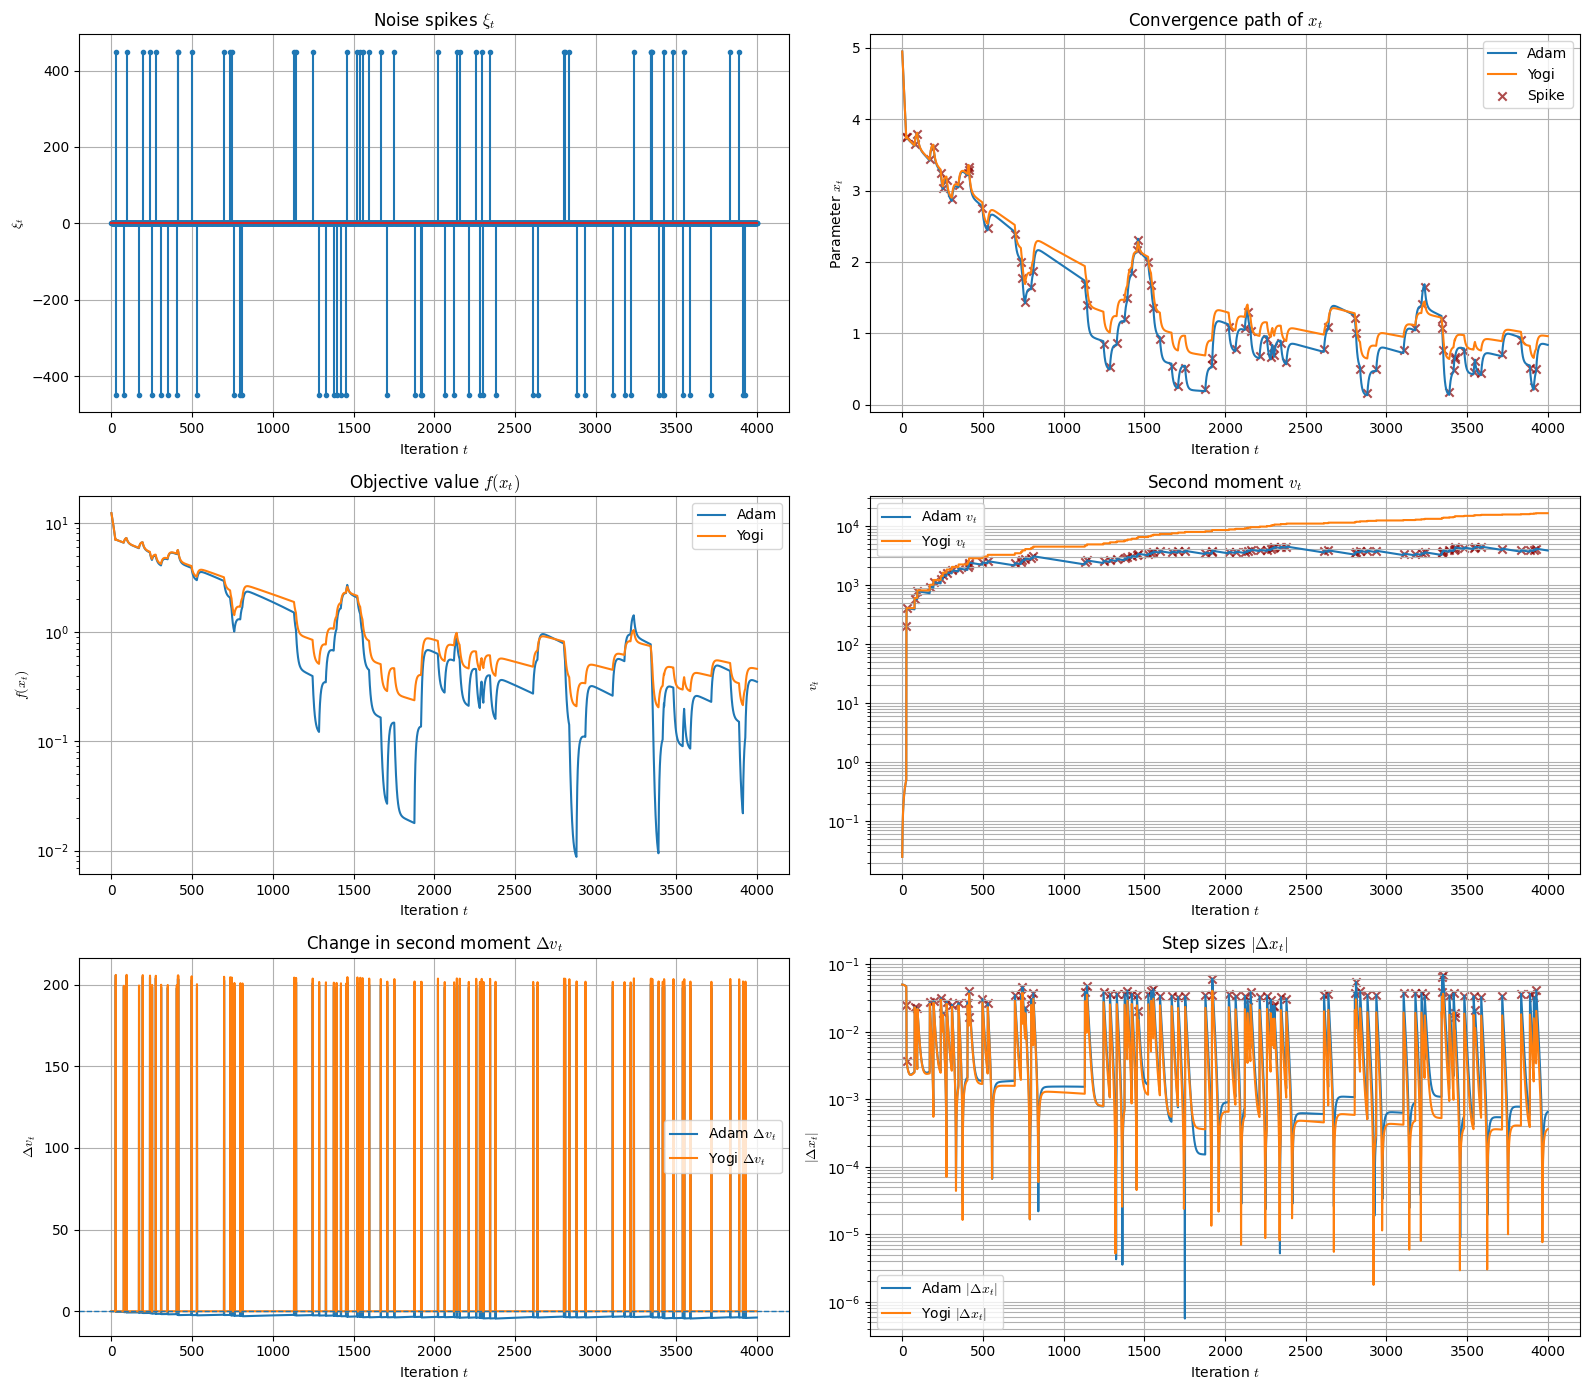

In [ ]:
# ============================================================
#  PLOTS – 6 FIGURES, arranged 3 rows × 2 columns
# ============================================================
plt.rcParams['mathtext.fontset'] = 'cm'
t_axis = np.arange(T)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

# 1. Noise spikes
axes[0].stem(t_axis, xis, markerfmt=".")
axes[0].set_title("Noise spikes $\\xi_t$")
axes[0].set_xlabel("Iteration $t$")
axes[0].set_ylabel("$\\xi_t$")
axes[0].grid(True)

# 2. Trajectory x_t
axes[1].plot(t_axis, xsA, label="Adam")
axes[1].plot(t_axis, xsY, label="Yogi")
axes[1].scatter(spike_idx, xsA[spike_idx], color="darkred", marker="x", label="Spike", alpha=0.7)
axes[1].set_title("Convergence path of $x_t$")
axes[1].set_xlabel("Iteration $t$")
axes[1].set_ylabel("Parameter $x_t$")
axes[1].legend()
axes[1].grid(True)

# 3. Objective value
axes[2].plot(t_axis, fA, label="Adam")
axes[2].plot(t_axis, fY, label="Yogi")
axes[2].set_yscale("log")
axes[2].set_title("Objective value $f(x_t)$")
axes[2].set_xlabel("Iteration $t$")
axes[2].set_ylabel("$f(x_t)$")
axes[2].legend()
axes[2].grid(True)

# 4. Second moment v_t (log scale)
axes[3].plot(t_axis, vsA, label="Adam $v_t$")
axes[3].plot(t_axis, vsY, label="Yogi $v_t$")
axes[3].scatter(spike_idx, vsA[spike_idx], color="darkred", marker="x", alpha=0.7)
axes[3].set_yscale("log")
axes[3].set_title("Second moment $v_t$")
axes[3].set_xlabel("Iteration $t$")
axes[3].set_ylabel("$v_t$")
axes[3].legend()
axes[3].grid(True, which="both")

# 5. Δv_t (change in second moment)
axes[4].plot(t_axis, dvsA, label="Adam $\\Delta v_t$")
axes[4].plot(t_axis, dvsY, label="Yogi $\\Delta v_t$")
axes[4].axhline(0, linestyle="--", linewidth=1)
axes[4].set_title("Change in second moment $\\Delta v_t$")
axes[4].set_xlabel("Iteration $t$")
axes[4].set_ylabel("$\\Delta v_t$")
axes[4].legend()
axes[4].grid(True)

# 6. Step sizes |Δx_t| (log scale)
axes[5].plot(t_axis, stepsA, label="Adam $|\\Delta x_t|$")
axes[5].plot(t_axis, stepsY, label="Yogi $|\\Delta x_t|$")
axes[5].scatter(spike_idx, stepsA[spike_idx], color="darkred", marker="x", alpha=0.7)
axes[5].set_yscale("log")
axes[5].set_title("Step sizes $|\\Delta x_t|$")
axes[5].set_xlabel("Iteration $t$")
axes[5].set_ylabel("$|\\Delta x_t|$")
axes[5].legend()
axes[5].grid(True, which="both")

plt.tight_layout()
plt.show()


#### Kết luận:

Thí nghiệm trên hàm lồi $f(x) = \frac{1}{2}x^{2}$
với gradient nhiễu chứa các spike hiếm cho thấy cả Adam và Yogi đều tiến về vùng lân cận nghiệm tối ưu, thể hiện hành vi hội tụ ngay cả trong môi trường nhiễu mạnh. Tuy nhiên, kết quả và các biểu đồ minh họa cho thấy sự khác biệt rõ ràng giữa hai thuật toán trong cách xử lý gradient bất thường.

Thứ nhất, moment bậc hai của Adam tăng đơn điệu và bị đẩy lên đáng kể sau mỗi spike. Biểu đồ $v_t$ và $\Delta v_t$ xác nhận rằng
$\Delta v_t^{Adam}$ hầu như luôn không âm, dẫn đến việc $v_t$
bị phóng đại kéo dài. Điều này làm giảm đáng kể bước cập nhật do mẫu số $v_t$ trở nên rất lớn. Quan sát từ biểu đồ $|\Delta x_t|$ cho thấy Adam thường rơi vào trạng thái bước đi rất nhỏ trong nhiều vòng lặp sau spike.

Thứ hai, Yogi thể hiện cơ chế điều chỉnh moment bậc hai linh hoạt hơn.
Biểu đồ $\Delta v_t$ cho thấy Yogi có cả giá trị dương và âm, chứng tỏ $v_t$ có thể tăng, giảm khi gặp spike và gradient trở lại ổn định. Nhờ đó, moment bậc hai không bị tích lũy quá mức, dẫn đến bước cập nhật ổn định và ít khi bị triệt tiêu như ở Adam.

Tổng thể, các biểu đồ và số liệu thực nghiệm minh họa đúng hạn chế cấu trúc của Adam khi gặp gradient spike — cụ thể là việc moment bậc hai tăng không kiểm soát và bước cập nhật suy giảm đáng kể. Ngược lại, Yogi khắc phục được vấn đề này nhờ cơ chế cập nhật moment bậc hai có dấu, từ đó duy trì được tốc độ học ổn định hơn trong môi trường nhiễu nặng.





### Thực nghiệm minh họa với bài toán phân loại thực tế MNIST.

In [8]:
#Import Libraries
import time
import copy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataset import random_split
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Optimizer

In [5]:
num_epochs = 20
num_classes = 10
batch_size = 128
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
%%capture
# =========================
# 2. DataLoader + tiền xử lý
# =========================
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

train_dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('data', train=False, transform=transform)

# Before
print('Train data set:', len(train_dataset))
print('Test data set:', len(test_dataset))

# Random split
train_set_size = int(len(train_dataset) * 0.8)
indices = list(range(train_set_size))
split = int(np.floor(.2 * train_set_size))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler =  SequentialSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, sampler=train_sampler,batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,sampler=valid_sampler,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

In [16]:
class NeuralNet(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, act_func=nn.ReLU()):
        super(NeuralNet, self).__init__()
        layers = []
        layers.append(nn.Linear(in_channels, hidden_channels[0]))
        layers.append(act_func) # activation function
        # Hidden layers
        for i in range(1, len(hidden_channels)):
            layers.append(nn.Linear(hidden_channels[i-1], hidden_channels[i]))
            layers.append(act_func) # activation function
        layers.append(nn.Linear(hidden_channels[-1], out_channels))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        out = self.net(x)
        return out

In [23]:
def train_val_model(model, criterion, optimizer, dataloaders, num_epochs=25,
        scheduler=None, log_interval=None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Store losses and accuracies accross epochs
    losses, accuracies = dict(train=[], val=[]), dict(train=[], val=[])

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            nsamples = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.reshape(-1, 1*28*28).to(device)
                labels = labels.to(device)
                nsamples += inputs.shape[0]

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if scheduler is not None and phase == 'train':
                scheduler.step()

            #nsamples = dataloaders[phase].dataset.data.shape[0]
            epoch_loss = running_loss / nsamples
            epoch_acc = running_corrects.double() / nsamples

            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        if log_interval is not None and epoch % log_interval == 0:
            print(f"Epoch {epoch+1:02d}/{num_epochs:02d} | "
                  f"train_loss={losses['train'][-1]:.4f} acc={accuracies['train'][-1]:.5f} | "
                  f"val_loss={losses['val'][-1]:.4f} acc={accuracies['val'][-1]:.5f}")

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, losses, accuracies

In [18]:
# =========================
# 4. Định nghĩa Yogi Optimizer
# =========================
class Yogi(Optimizer):
    def __init__(self, params, lr=1e-3,
                 betas=(0.9, 0.999),
                 eps=1e-8,
                 weight_decay=0.0):
        if lr <= 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta1 value: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta2 value: {}".format(betas[1]))

        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay)
        super(Yogi, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            lr = group["lr"]
            beta1, beta2 = group["betas"]
            eps = group["eps"]
            wd = group["weight_decay"]

            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad

                if grad.is_sparse:
                    raise RuntimeError("Yogi does not support sparse gradients")

                # weight decay
                if wd != 0:
                    grad = grad.add(p, alpha=wd)

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state["step"] = 0
                    state["exp_avg"] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state["exp_avg_sq"] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state["exp_avg"], state["exp_avg_sq"]

                state["step"] += 1
                t = state["step"]

                # First moment (như Adam)
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)

                # Second moment kiểu Yogi
                grad_sq = grad * grad
                exp_avg_sq.add_(
                    (grad_sq - exp_avg_sq).sign() * grad_sq,
                    alpha=(1 - beta2)
                )

                # Bias correction
                bias_correction1 = 1 - beta1 ** t
                bias_correction2 = 1 - beta2 ** t

                denom = (exp_avg_sq / bias_correction2).sqrt().add_(eps)
                step_size = lr / bias_correction1

                p.addcdiv_(exp_avg, denom, value=-step_size)

        return loss

In [11]:
!pip install torchinfo

In [19]:
from torchinfo import summary
model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10)
summary(model, input_size=(128, 1*28*28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Linear: 2-1                       [128, 300]                235,500
│    └─ReLU: 2-2                         [128, 300]                --
│    └─Linear: 2-3                       [128, 200]                60,200
│    └─ReLU: 2-4                         [128, 200]                --
│    └─Linear: 2-5                       [128, 100]                20,100
│    └─ReLU: 2-6                         [128, 100]                --
│    └─Linear: 2-7                       [128, 10]                 1,010
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 40.55
Input size (MB): 0.40
Forward/backward pass size (MB): 0.62
Params size (MB): 1.27
Estimated Total Size (MB): 2.29

In [20]:
optimizer_constructors = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.1),
    "SGD+momentum": lambda params: torch.optim.SGD(params, lr=0.1, momentum=0.9),
    "SGD+Nesterov": lambda params: torch.optim.SGD(params, lr=0.1, momentum=0.9, nesterov=True),
    "Adagrad": lambda params: torch.optim.Adagrad(params, lr=0.01),
    "Adadelta": lambda params: torch.optim.Adadelta(params, lr=1.0),
    "Adam": lambda params: torch.optim.Adam(params, lr=0.001),
    "Yogi": lambda params: Yogi(params, lr=0.001),
}


In [21]:
def evaluate_testset(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc


In [24]:
num_epochs = 20
all_histories = {}   # lưu toàn bộ loss/acc theo epoch
summary = {}         # lưu kết quả cuối cùng (bảng)
dataloaders = dict(train=train_loader, val=valid_loader)
criterion = torch.nn.CrossEntropyLoss()

for opt_name, opt_fn in optimizer_constructors.items():
    print(f"\n===== Training with {opt_name} =====")

    # Khởi tạo lại model mới cho từng optimizer
    model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10).to(device)
    optimizer = opt_fn(model.parameters())
    model, losses, accuracies = train_val_model(model, criterion, optimizer, dataloaders, num_epochs=20, log_interval=1)

    # Lưu full history
    all_histories[opt_name] = {
        "train_loss": losses["train"],
        "val_loss": losses["val"],
        "train_acc": accuracies["train"],
        "val_acc": accuracies["val"],
    }

    # Tính test_acc nếu có test_loader
    test_acc = None
    test_acc = evaluate_testset(model, test_loader, device)

    # Lưu kết quả cho bảng
    summary[opt_name] = {
        "train_loss": float(losses["train"][-1]),
        "val_loss": float(losses["val"][-1]),
        "train_acc": float(accuracies["train"][-1]),
        "val_acc": float(accuracies["val"][-1]),
        "test_acc": float(test_acc) if test_acc is not None else None,
    }



===== Training with SGD =====
Epoch 01/20 | train_loss=0.6532 acc=0.80003 | val_loss=0.2333 acc=0.93281
Epoch 02/20 | train_loss=0.1921 acc=0.94224 | val_loss=0.1732 acc=0.94917
Epoch 03/20 | train_loss=0.1244 acc=0.96263 | val_loss=0.1321 acc=0.96177
Epoch 04/20 | train_loss=0.0892 acc=0.97310 | val_loss=0.1090 acc=0.96646
Epoch 05/20 | train_loss=0.0668 acc=0.97979 | val_loss=0.0975 acc=0.97073
Epoch 06/20 | train_loss=0.0511 acc=0.98495 | val_loss=0.0928 acc=0.97302
Epoch 07/20 | train_loss=0.0396 acc=0.98755 | val_loss=0.1053 acc=0.96917
Epoch 08/20 | train_loss=0.0289 acc=0.99167 | val_loss=0.0853 acc=0.97583
Epoch 09/20 | train_loss=0.0213 acc=0.99427 | val_loss=0.0875 acc=0.97563
Epoch 10/20 | train_loss=0.0148 acc=0.99648 | val_loss=0.0903 acc=0.97448
Epoch 11/20 | train_loss=0.0095 acc=0.99818 | val_loss=0.0857 acc=0.97823
Epoch 12/20 | train_loss=0.0065 acc=0.99893 | val_loss=0.0864 acc=0.97813
Epoch 13/20 | train_loss=0.0041 acc=0.99966 | val_loss=0.0883 acc=0.97865
Epoch 1

In [26]:
import pandas as pd

summary_df = pd.DataFrame.from_dict(summary, orient="index")
summary_df = summary_df[
    ["train_loss", "train_acc", "val_loss", "val_acc", "test_acc"]
]

summary_df.round(4)


,train_loss,train_acc,val_loss,val_acc,test_acc
SGD,0.0010,0.9999,0.0982,0.9795,0.9800
SGD+momentum,0.0032,0.9992,0.1380,0.9795,0.9797
SGD+Nesterov,0.0084,0.9976,0.1627,0.9745,0.9786
Adagrad,0.0014,0.9999,0.1049,0.9768,0.9793
Adadelta,0.0000,1.0000,0.1438,0.9809,0.9822
Adam,0.0094,0.9967,0.1343,0.9756,0.9786
Yogi,0.0001,1.0000,0.1144,0.9800,0.9814


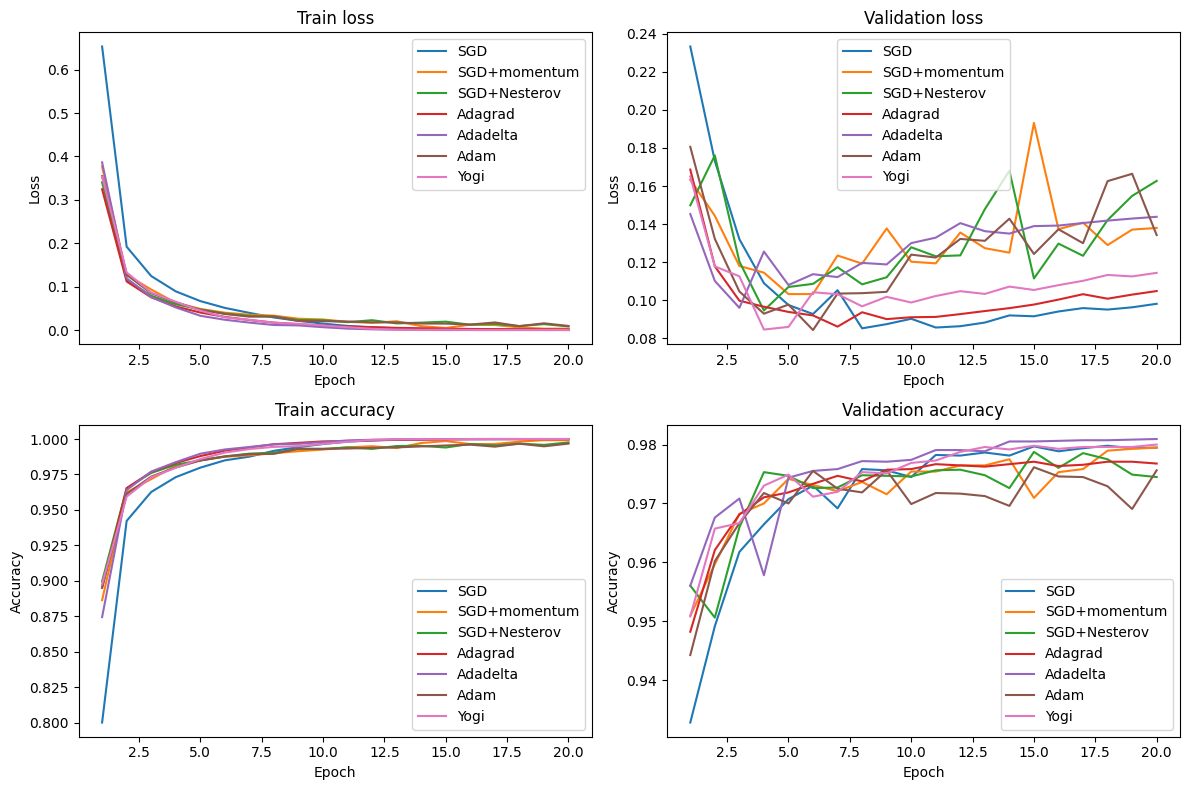

In [30]:
import matplotlib.pyplot as plt
epochs = np.arange(1, num_epochs + 1)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Train loss
ax = axes[0, 0]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["train_loss"], label=opt_name)
ax.set_title("Train loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 2. Val loss
ax = axes[0, 1]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["val_loss"], label=opt_name)
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 3. Train accuracy
ax = axes[1, 0]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["train_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Train accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

# 4. Val accuracy
ax = axes[1, 1]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["val_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Validation accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.tight_layout()
plt.show()



#### 1. Tốc độ hội tụ

Trong thực nghiệm huấn luyện mạng CNN trên tập dữ liệu MNIST với 10 epoch, bốn thuật toán tối ưu – SGD, Adam, Yogi và AdaDelta – cho thấy các đặc trưng hội tụ khác nhau, phản ánh đúng bản chất lý thuyết của từng phương pháp. Kết quả được trình bày qua các đường cong train/test loss và test accuracy, cùng với log huấn luyện chi tiết.

Sự khác biệt về tốc độ hội tụ thể hiện rất rõ ngay từ các epoch đầu:

SGD chỉ đạt 36.99% accuracy, test loss còn rất cao (≈2,18).

Adam và Yogi đã đạt khoảng 90.45 – 90.52% accuracy, test loss ≈0,34.

AdaDelta đạt 94.34% accuracy, test loss ≈0,2 – tốt nhất trong bốn thuật toán.

Đến epoch 3, các thuật toán thích nghi (Adam, Yogi, AdaDelta) đã gần đạt tới ngưỡng bão hòa (≈95–97% accuracy), trong khi SGD mới đạt 81,32%. Kết thúc epoch 10:

*   SGD: 92,70%
*   Adam: 97,97%
*   Yogi: 97,95%
*   AdaDelta: 98,65% (cao nhất)

Như vậy, về tốc độ hội tụ, nhóm thuật toán thích nghi (Adam, Yogi, AdaDelta) vượt trội so với SGD; trong nhóm này, AdaDelta cho kết quả tốt nhất trên bài toán MNIST cụ thể này, cả về tốc độ giảm loss lẫn độ chính xác cuối cùng.


#### 2. Độ ổn định và khả năng khái quát hóa

Quan sát đường cong loss và accuracy:

*   SGD: Train loss giảm đều nhưng chậm, từ 2.1797 ở epoch 1 xuống còn 0.2599 ở epoch 10. Test accuracy cũng tăng dần từ 36.99% → 92.70%, không xuất hiện dao động mạnh giữa các epoch. Sau 10 epoch, mô hình vẫn chưa có dấu hiệu quá khớp vì test loss tiếp tục giảm đều. Điều này cho thấy SGD cho quá trình tối ưu ổn định nhưng hội tụ chậm, cần nhiều epoch hơn để đạt mức hiệu năng tương đương các thuật toán thích nghi.

*   Adam: test loss giảm rất nhanh trong 2–3 epoch đầu, Sau đó, test loss dao động nhẹ quanh mức thấp (từ 0.0597 đến khoảng 0.1369), và accuracy tăng nhanh lên trên 97% từ epoch 5 trở đi (đạt 97.97% ở epoch 10). Đường cong khá mượt, không xuất hiện suy giảm rõ rệt ở các epoch sau, cho thấy Adam hội tụ nhanh và duy trì rất ổn định.

*   Yogi: cho quỹ đạo loss và accuracy rất gần với Adam. Test loss dao động trong khoảng 0.0654 – 0.1859, và accuracy nằm trong vùng 90.52% – 98.00%, gần như trùng với Adam ở mọi epoch. Điều này phù hợp với thiết kế lý thuyết của Yogi, vốn điều chỉnh moment bậc hai theo cách “bảo thủ” hơn để hạn chế việc ước lượng phương sai tăng quá lớn như Adam, từ đó giữ cho bước cập nhật ổn định hơn. Trong thí nghiệm này, Yogi tái hiện gần như chính xác hành vi của Adam.

*   AdaDelta: Cả train loss và test loss đều giảm nhanh và gần như đơn điệu, từ 0.1975 ở epoch 1 xuống 0.0424 ở epoch 10. Test accuracy tăng đều qua từng epoch, từ 94.34% → 98.65%, và luôn là cao nhất trong bốn thuật toán ở mọi epoch. Các đường cong rất mượt và ít dao động, thể hiện độ ổn định cao và khả năng khái quát hóa tốt trên tập test trong thiết lập thí nghiệm này.

Nhận định: Về ổn định, ba thuật toán thích nghi đều vượt trội so với SGD, trong đó AdaDelta cho quỹ đạo mượt nhất; Adam và Yogi thể hiện mức độ ổn định tương đương nhau. Ngoài ra, Adam, Yogi và AdaDelta đều đạt độ chính xác cao, phù hợp với kiến trúc CNN nhỏ trên MNIST. AdaDelta đạt kết quả tốt nhất trong thiết lập này nhưng không đồng nghĩa là luôn tốt hơn trên mọi bài toán khác.

#### 3. Gợi ý lựa chọn thuật toán theo bối cảnh sử dụng

Từ kết quả thực nghiệm và đặc tính lý thuyết của từng thuật toán, có thể đề xuất:

*   SGD với momentum

    *   Phù hợp làm baseline.
    *   Thích hợp khi dùng lịch learning rate tốt hoặc huấn luyện dài hạn.
    *   Không phù hợp khi yêu cầu hội tụ nhanh.


*   Adam
    *   Lựa chọn rất phổ biến cho các mô hình sâu (CNN phức tạp, Transformer, NLP).
    *   Hội tụ nhanh, ít cần tinh chỉnh learning rate.
    *   Rất hiệu quả trong giai đoạn đầu.


*   Yogi
    *   Biến thể của Adam nhằm kiểm soát moment bậc hai, phù hợp khi gradient nhiễu hoặc không ổn định.
    *   Trong thí nghiệm này, hiệu năng tương đương Adam.
    *   Hợp lý khi muốn sự ổn định hơn trong các bài toán phức tạp hoặc không dừng.
    

*   AdaDelta
    *   Hoạt động tốt trong các mô hình CNN nhỏ – trung bình, đặc biệt khi không muốn tuning learning rate nhiều.
    *   Cho kết quả tốt nhất trên MNIST trong thí nghiệm này.
    *   Tuy nhiên, hiệu năng có thể khác ở các bài toán phức tạp hơn.